In [1]:
import fastText
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
import re
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os

np.set_printoptions(suppress=True)
# from gensim.models.wrappers import FastText 

os.chdir('/home/swaroop/Downloads/fastText_template')

In [2]:
df = pd.read_csv('yelp_review.csv')

In [3]:
df = df[['stars', 'text']]

In [4]:
df['stars'] = df['stars'].apply(lambda x: '__label__'+str(x))

In [5]:
df.head()

,stars,text
0,__label__5,Super simple place but amazing nonetheless. It...
1,__label__5,Small unassuming place that changes their menu...
2,__label__5,Lester's is located in a beautiful neighborhoo...
3,__label__4,Love coming here. Yes the place always needs t...
4,__label__4,Had their chocolate almond croissant and it wa...


In [6]:
symbols_to_isolate = '.,?!-;*"…:—()%#$&_/@＼・ω+=”“[]^–>\\°<~•≠™ˈʊɒ∞§{}·τα❤☺ɡ|¢→̶`❥━┣┫┗Ｏ►★©―ɪ✔®\x96\x92●£♥➤´¹☕≈÷♡◐║▬′ɔː€۩۞†μ✒➥═☆ˌ◄½ʻπδηλσερνʃ✬ＳＵＰＥＲＩＴ☻±♍µº¾✓◾؟．⬅℅»Вав❣⋅¿¬♫ＣＭβ█▓▒░⇒⭐›¡₂₃❧▰▔◞▀▂▃▄▅▆▇↙γ̄″☹➡«φ⅓„✋：¥̲̅́∙‛◇✏▷❓❗¶˚˙）сиʿ✨。ɑ\x80◕！％¯−ﬂﬁ₁²ʌ¼⁴⁄₄⌠♭✘╪▶☭✭♪☔☠♂☃☎✈✌✰❆☙○‣⚓年∎ℒ▪▙☏⅛ｃａｓǀ℮¸ｗ‚∼‖ℳ❄←☼⋆ʒ⊂、⅔¨͡๏⚾⚽Φ×θ￦？（℃⏩☮⚠月✊❌⭕▸■⇌☐☑⚡☄ǫ╭∩╮，例＞ʕɐ̣Δ₀✞┈╱╲▏▕┃╰▊▋╯┳┊≥☒↑☝ɹ✅☛♩☞ＡＪＢ◔◡↓♀⬆̱ℏ\x91⠀ˤ╚↺⇤∏✾◦♬³の｜／∵∴√Ω¤☜▲↳▫‿⬇✧ｏｖｍ－２０８＇‰≤∕ˆ⚜☁'
symbols_to_delete = '\n🍕\r🐵😑\xa0\ue014\t\uf818\uf04a\xad😢🐶️\uf0e0😜😎👊\u200b\u200e😁عدويهصقأناخلىبمغر😍💖💵Е👎😀😂\u202a\u202c🔥😄🏻💥ᴍʏʀᴇɴᴅᴏᴀᴋʜᴜʟᴛᴄᴘʙғᴊᴡɢ😋👏שלוםבי😱‼\x81エンジ故障\u2009🚌ᴵ͞🌟😊😳😧🙀😐😕\u200f👍😮😃😘אעכח💩💯⛽🚄🏼ஜ😖ᴠ🚲‐😟😈💪🙏🎯🌹😇💔😡\x7f👌ἐὶήιὲκἀίῃἴξ🙄Ｈ😠\ufeff\u2028😉😤⛺🙂\u3000تحكسة👮💙فزط😏🍾🎉😞\u2008🏾😅😭👻😥😔😓🏽🎆🍻🍽🎶🌺🤔😪\x08‑🐰🐇🐱🙆😨🙃💕𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘪𝘧𝘮𝘣💗💚地獄谷улкнПоАН🐾🐕😆ה🔗🚽歌舞伎🙈😴🏿🤗🇺🇸мυтѕ⤵🏆🎃😩\u200a🌠🐟💫💰💎эпрд\x95🖐🙅⛲🍰🤐👆🙌\u2002💛🙁👀🙊🙉\u2004ˢᵒʳʸᴼᴷᴺʷᵗʰᵉᵘ\x13🚬🤓\ue602😵άοόςέὸתמדףנרךצט😒͝🆕👅👥👄🔄🔤👉👤👶👲🔛🎓\uf0b7\uf04c\x9f\x10成都😣⏺😌🤑🌏😯ех😲Ἰᾶὁ💞🚓🔔📚🏀👐\u202d💤🍇\ue613小土豆🏡❔⁉\u202f👠》कर्मा🇹🇼🌸蔡英文🌞🎲レクサス😛外国人关系Сб💋💀🎄💜🤢َِьыгя不是\x9c\x9d🗑\u2005💃📣👿༼つ༽😰ḷЗз▱ц￼🤣卖温哥华议会下降你失去所有的钱加拿大坏税骗子🐝ツ🎅\x85🍺آإشء🎵🌎͟ἔ油别克🤡🤥😬🤧й\u2003🚀🤴ʲшчИОРФДЯМюж😝🖑ὐύύ特殊作戦群щ💨圆明园קℐ🏈😺🌍⏏ệ🍔🐮🍁🍆🍑🌮🌯🤦\u200d𝓒𝓲𝓿𝓵안영하세요ЖљКћ🍀😫🤤ῦ我出生在了可以说普通话汉语好极🎼🕺🍸🥂🗽🎇🎊🆘🤠👩🖒🚪天一家⚲\u2006⚭⚆⬭⬯⏖新✀╌🇫🇷🇩🇪🇮🇬🇧😷🇨🇦ХШ🌐\x1f杀鸡给猴看ʁ𝗪𝗵𝗲𝗻𝘆𝗼𝘂𝗿𝗮𝗹𝗶𝘇𝗯𝘁𝗰𝘀𝘅𝗽𝘄𝗱📺ϖ\u2000үսᴦᎥһͺ\u2007հ\u2001ɩｙｅ൦ｌƽｈ𝐓𝐡𝐞𝐫𝐮𝐝𝐚𝐃𝐜𝐩𝐭𝐢𝐨𝐧Ƅᴨןᑯ໐ΤᏧ௦Іᴑ܁𝐬𝐰𝐲𝐛𝐦𝐯𝐑𝐙𝐣𝐇𝐂𝐘𝟎ԜТᗞ౦〔Ꭻ𝐳𝐔𝐱𝟔𝟓𝐅🐋ﬃ💘💓ё𝘥𝘯𝘶💐🌋🌄🌅𝙬𝙖𝙨𝙤𝙣𝙡𝙮𝙘𝙠𝙚𝙙𝙜𝙧𝙥𝙩𝙪𝙗𝙞𝙝𝙛👺🐷ℋ𝐀𝐥𝐪🚶𝙢Ἱ🤘ͦ💸ج패티Ｗ𝙇ᵻ👂👃ɜ🎫\uf0a7БУі🚢🚂ગુજરાતીῆ🏃𝓬𝓻𝓴𝓮𝓽𝓼☘﴾̯﴿₽\ue807𝑻𝒆𝒍𝒕𝒉𝒓𝒖𝒂𝒏𝒅𝒔𝒎𝒗𝒊👽😙\u200cЛ‒🎾👹⎌🏒⛸公寓养宠物吗🏄🐀🚑🤷操美𝒑𝒚𝒐𝑴🤙🐒欢迎来到阿拉斯ספ𝙫🐈𝒌𝙊𝙭𝙆𝙋𝙍𝘼𝙅ﷻ🦄巨收赢得白鬼愤怒要买额ẽ🚗🐳𝟏𝐟𝟖𝟑𝟕𝒄𝟗𝐠𝙄𝙃👇锟斤拷𝗢𝟳𝟱𝟬⦁マルハニチロ株式社⛷한국어ㄸㅓ니͜ʖ𝘿𝙔₵𝒩ℯ𝒾𝓁𝒶𝓉𝓇𝓊𝓃𝓈𝓅ℴ𝒻𝒽𝓀𝓌𝒸𝓎𝙏ζ𝙟𝘃𝗺𝟮𝟭𝟯𝟲👋🦊多伦🐽🎻🎹⛓🏹🍷🦆为和中友谊祝贺与其想象对法如直接问用自己猜本传教士没积唯认识基督徒曾经让相信耶稣复活死怪他但当们聊些政治题时候战胜因圣把全堂结婚孩恐惧且栗谓这样还♾🎸🤕🤒⛑🎁批判检讨🏝🦁🙋😶쥐스탱트뤼도석유가격인상이경제황을렵게만들지않록잘관리해야합다캐나에서대마초와화약금의품런성분갈때는반드시허된사용🔫👁凸ὰ💲🗯𝙈Ἄ𝒇𝒈𝒘𝒃𝑬𝑶𝕾𝖙𝖗𝖆𝖎𝖌𝖍𝖕𝖊𝖔𝖑𝖉𝖓𝖐𝖜𝖞𝖚𝖇𝕿𝖘𝖄𝖛𝖒𝖋𝖂𝕴𝖟𝖈𝕸👑🚿💡知彼百\uf005𝙀𝒛𝑲𝑳𝑾𝒋𝟒😦𝙒𝘾𝘽🏐𝘩𝘨ὼṑ𝑱𝑹𝑫𝑵𝑪🇰🇵👾ᓇᒧᔭᐃᐧᐦᑳᐨᓃᓂᑲᐸᑭᑎᓀᐣ🐄🎈🔨🐎🤞🐸💟🎰🌝🛳点击查版🍭𝑥𝑦𝑧ＮＧ👣\uf020っ🏉ф💭🎥Ξ🐴👨🤳🦍\x0b🍩𝑯𝒒😗𝟐🏂👳🍗🕉🐲چی𝑮𝗕𝗴🍒ꜥⲣⲏ🐑⏰鉄リ事件ї💊「」\uf203\uf09a\uf222\ue608\uf202\uf099\uf469\ue607\uf410\ue600燻製シ虚偽屁理屈Г𝑩𝑰𝒀𝑺🌤𝗳𝗜𝗙𝗦𝗧🍊ὺἈἡχῖΛ⤏🇳𝒙ψՁմեռայինրւդձ冬至ὀ𝒁🔹🤚🍎𝑷🐂💅𝘬𝘱𝘸𝘷𝘐𝘭𝘓𝘖𝘹𝘲𝘫کΒώ💢ΜΟΝΑΕ🇱♲𝝈↴💒⊘Ȼ🚴🖕🖤🥘📍👈➕🚫🎨🌑🐻𝐎𝐍𝐊𝑭🤖🎎😼🕷ｇｒｎｔｉｄｕｆｂｋ𝟰🇴🇭🇻🇲𝗞𝗭𝗘𝗤👼📉🍟🍦🌈🔭《🐊🐍\uf10aლڡ🐦\U0001f92f\U0001f92a🐡💳ἱ🙇𝗸𝗟𝗠𝗷🥜さようなら🔼'


isolate_dict = {ord(c):f' {c} ' for c in symbols_to_isolate}
remove_dict = {ord(c):f'' for c in symbols_to_delete}


def handle_punctuation(x):
    x = x.translate(remove_dict)
    x = x.translate(isolate_dict)
    return x

def handle_contractions(x):
    x = tokenizer.tokenize(x)
    return x

def fix_quote(x):
    x = [x_[1:] if x_.startswith("'") else x_ for x_ in x]
    x = ' '.join(x)
    return x

def preprocess(x):
    x = handle_punctuation(x)
    x = handle_contractions(x)
    x = fix_quote(x)
    return x

df['text'] = df['text'].apply(lambda x:preprocess(x))
# df['text'] = df['text'].apply(normalize)

In [7]:
# def normalize(s):
#     """
#     Given a text, cleans and normalizes it. Feel free to add your own stuff.
#     """
#     s = s.lower()
#     # Replace ips
#     s = re.sub(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', ' _ip_ ', s)
#     # Isolate punctuation
#     s = re.sub(r'([.\(\)\!\?\-\\\/\,])', r' \1 ', s)
#     # Remove some special characters
#     s = re.sub(r'([\;\:\|•«\n])', ' ', s)
#     # Replace numbers and symbols with language
#     s = s.replace('&', ' and ')
#     s = s.replace('@', ' at ')
#     s = s.replace('0', ' zero ')
#     s = s.replace('1', ' one ')
#     s = s.replace('2', ' two ')
#     s = s.replace('3', ' three ')
#     s = s.replace('4', ' four ')
#     s = s.replace('5', ' five ')
#     s = s.replace('6', ' six ')
#     s = s.replace('7', ' seven ')
#     s = s.replace('8', ' eight ')
#     s = s.replace('9', ' nine ')
#     return s

In [8]:
# Convert all upper case to lower case and separate out the punctuations
# df['text'] = df['text'].apply(normalize)

#### Split the whole dataset into training and validation.  fastText uses the c++ api directly so the computation is actualy happening outside of the notebook. Hence you cannot pass pandas dataframe or other general objects into fastText directly. You need to saved the training file in a text file format. Acceptable separators: space '\s' and tabs '\t'

In [9]:
train, test = train_test_split(df, test_size=0.2)
# train_file = 'nb_train.csv'
# test_file = 'nb_test.csv'
# train.to_csv("nb_train.csv", sep="\t", quoting=csv.QUOTE_NONE, index=False, header=False)
# test.to_csv("nb_test.csv", sep="\t", quoting=csv.QUOTE_NONE, index=False, header=False)

In [10]:
test.head()

,stars,text
151155,__label__5,Ruth s Chris is terrific in every way . Servic...
4128278,__label__2,"Visited in 2012 \ / 13 - Amazing , 5 \ / 5 sta..."
4938406,__label__2,This seems to me like a mash up between Granvi...
1634389,__label__4,What a treasure ! It s hidden behind downtown ...
93980,__label__4,"My brother in law took us here for dinner , th..."



# Model training

In [13]:
train.to_csv("nb_train_1.csv", sep="\t", quoting=csv.QUOTE_NONE, index=False, header=False)
nb_model = fastText.train_supervised(input=train_file, epoch=25, lr=1.0, wordNgrams=2, verbose=2, minCount=1)

In [22]:
test.to_csv("nb_test_1.csv", sep="\t", quoting=csv.QUOTE_NONE, index=False, header=False)

In [24]:
test_file = 'nb_test_1.csv'

In [14]:
# nb_model.save_model('nb_model.bin')

# Prediction

In [15]:
nb_model = fastText.load_model('nb_model.bin')

In [16]:
nb_model.get_word_vector('restaurant')

array([-1.1095498 ,  0.54911035,  0.15394951, -0.51039344,  0.583803  ,
       -0.50851107,  0.37289533,  0.01636588,  0.12660414,  0.20874849,
        0.7286935 ,  0.61629766, -1.1506519 , -0.766879  , -0.81863344,
        0.24394365, -0.12309986,  0.4162688 ,  0.7556536 , -0.32927552,
        0.6587452 ,  0.52663594, -0.5493853 ,  0.7298485 , -0.1506455 ,
        0.63257647,  0.13715762,  0.27539858, -0.08073968,  0.00704558,
        0.19949469, -0.82705384, -0.27115935,  0.3719119 ,  0.02185969,
        0.347432  ,  0.4017768 ,  0.71583086,  0.8204945 , -0.49603835,
       -0.9255384 ,  0.08040242, -0.19093616,  0.54763615,  0.48908532,
        0.23532659, -0.68320394, -0.37351993,  0.29985318,  0.3808552 ,
        0.41384807,  0.28424343, -0.24632967, -0.6575839 ,  0.02728439,
       -0.27376357,  0.49227524, -0.06537498,  0.06684245,  0.2356381 ,
       -0.1784456 , -0.58833826,  0.05271085, -0.10463373, -0.94547313,
        0.1964246 , -0.4133385 ,  0.05162473, -0.15527233, -0.30

In [17]:
nb_model.get_sentence_vector('I love this restaurant')

array([ 0.25547606,  0.4413526 , -0.08240318, -0.6385485 , -0.02335843,
        0.43911085, -0.17623807, -0.19475783,  0.09615021, -0.03455932,
        0.01203573, -0.12643096, -0.20251438, -0.17285201, -0.48375872,
        0.07234178, -0.16299322,  0.14825174, -0.05846708,  0.08330899,
        0.21636859,  0.38362947,  0.00413771,  0.04906473,  0.028698  ,
       -0.01380564,  0.04675302, -0.1695306 , -0.08497383, -0.04182607,
        0.09143488, -0.080948  ,  0.30152863, -0.19193888, -0.1366362 ,
       -0.11873735,  0.05776121,  0.17570911,  0.07423649, -0.04409026,
       -0.15293473,  0.17260188,  0.19717413,  0.23917139,  0.41482154,
       -0.37129006,  0.01826708,  0.14743373, -0.24582295,  0.68974334,
       -0.25384367,  0.11372139, -0.26453814, -0.13872723, -0.22733034,
        0.08988665,  0.06324344,  0.08479786, -0.02024735, -0.34709376,
       -0.25150836,  0.2652849 ,  0.35600972,  0.18236363,  0.02516754,
       -0.35897183,  0.00627075, -0.06815576, -0.28370667,  0.12

In [18]:
nb_model.predict('I love this restaurant')

(('__label__5',), array([0.99954975]))

In [19]:
nb_model.predict('I love this restaurant', k=3)

(('__label__5', '__label__4', '__label__2'),
 array([0.99954975, 0.00047025, 0.00001   ]))

# Model Performance

# Pricision and recall for single label

In [20]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

In [25]:
print_results(*nb_model.test(test_file))

N	1052334
P@1	0.726
R@1	0.726


In [26]:
n, p, r = nb_model.test(test_file, 5)
print("N\t" + str(n))
print("P@{}\t{:.3f}".format(5, p))
print("R@{}\t{:.3f}".format(5, r))

N	1052334
P@5	0.200
R@5	1.000


In [27]:
def get_true_postive_count(cm, model, df, label_column_name, text_column_name, target_class):
    predictions = [model.predict(x)[0][0] for x in df[df[label_column_name] == target_class][text_column_name]]
    tp_count = len(list(filter(lambda x: x==target_class, predictions)))
    index = np.where(cm==tp_count)
    if index[0][0] == index[1][0]:
        return index[0][0]
    else:
        raise ValueError('COuld not find the index ' + index)
        
        
def resolve_labels_sequence(classes, cm, model, df, label_column_name, text_column_name):
    target_seq = [0] * len(classes)
    for label in classes:
        index = get_true_postive_count(cm, model, df, label_column_name, text_column_name, label)
        target_seq[index] = label
    return target_seq


def fasttext_confusion_matrix(model, pd_test_data, label_column_name, text_column_name):
    test_labels = pd_test_data[label_column_name]
    test_labels = np.array(test_labels)
    _classes = list(set(test_labels))
    pred_labels = [model.predict(x)[0][0] for x in pd_test_data[text_column_name]]
    pred_labels = np.array(pred_labels)
    eq = test_labels == pred_labels
    print("Accuracy: " + str(eq.sum() / len(test_labels)))
    cm = confusion_matrix(test_labels, pred_labels)
    labels = resolve_labels_sequence(_classes, cm, model, pd_test_data, label_column_name, text_column_name)
    print(labels)
    print(confusion_matrix(test_labels, pred_labels, labels=labels))
    df_cm = pd.DataFrame(cm, index = labels, columns = labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

Accuracy: 0.7257990333867385
['__label__1', '__label__2', '__label__3', '__label__4', '__label__5']
[[120563  15070   5677   2270   2413]
 [ 16302  49604  15310   4753   1500]
 [  4558  12728  67858  31281   6366]
 [  1778   3223  19245 157150  63594]
 [  2664   1890   6676  71253 368608]]


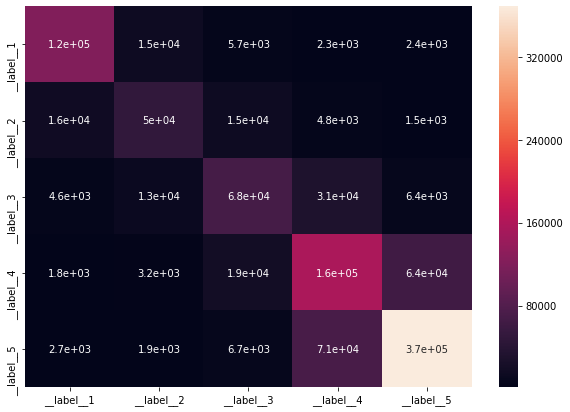

In [28]:
fasttext_confusion_matrix(nb_model, test, 'stars', 'text')